In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots display inside the notebook
%matplotlib inline


In [79]:
#Load datasets
co2_df = pd.read_csv('owid-co2-data.csv')
gdp_df = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_19294.csv", skiprows=4)  # Adjusted for World Bank GDP format


In [80]:
#Clean GDP dataset

# Rename 'Country Name' to 'Country' for consistency
gdp_df = gdp_df.rename(columns={'Country Name': 'Country'}).copy()

# Keep only Country and GDP for 2020
gdp_df = gdp_df[['Country', '2020']]

# Rename 2020 column to 'GDP'
gdp_df.rename(columns={'2020': 'GDP'}, inplace=True)


In [81]:
#Clean CO2 dataset

# Rename 'country' to 'Country'
co2_df = co2_df.rename(columns={'country': 'Country'}).copy()

# Filter for year 2020 only
co2_df = co2_df[co2_df['year'] == 2020]

# Keep only Country and CO2 emissions
co2_df = co2_df[['Country', 'co2']]


In [82]:
#Merge both datasets on 'Country'
merged_df = pd.merge(gdp_df, co2_df, on='Country', how='inner')

#Preview the merged dataset
print(merged_df.head())


       Country           GDP     co2
0        Aruba  2.481857e+09   0.821
1  Afghanistan  1.995593e+10  11.606
2       Angola  4.850156e+10  16.533
3      Albania  1.524146e+10   4.711
4      Andorra  2.891001e+09   0.381


In [83]:
#Check data types and missing values
print(merged_df[['GDP', 'co2']].dtypes)
print(merged_df[['GDP', 'co2']].isna().sum())
print("Shape before dropping NAs:", merged_df.shape)
print("Shape after dropping NAs:", merged_df[['GDP', 'co2']].dropna().shape)


GDP    float64
co2    float64
dtype: object
GDP    3
co2    2
dtype: int64
Shape before dropping NAs: (182, 3)
Shape after dropping NAs: (177, 2)


In [84]:
#drop empty columns
merged_df = merged_df.dropna(subset=['GDP', 'co2'])


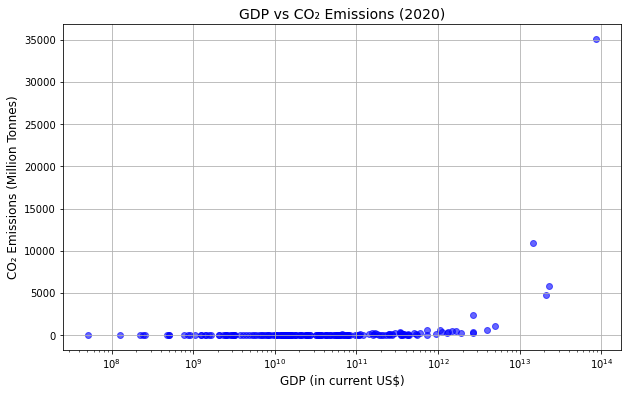

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['GDP'], merged_df['co2'], alpha=0.6, c='blue')
plt.title('GDP vs CO₂ Emissions (2020)', fontsize=14)
plt.xlabel('GDP (in current US$)', fontsize=12)
plt.ylabel('CO₂ Emissions (Million Tonnes)', fontsize=12)
plt.xscale('log')  # GDP scale varies widely
plt.grid(True)
plt.show()


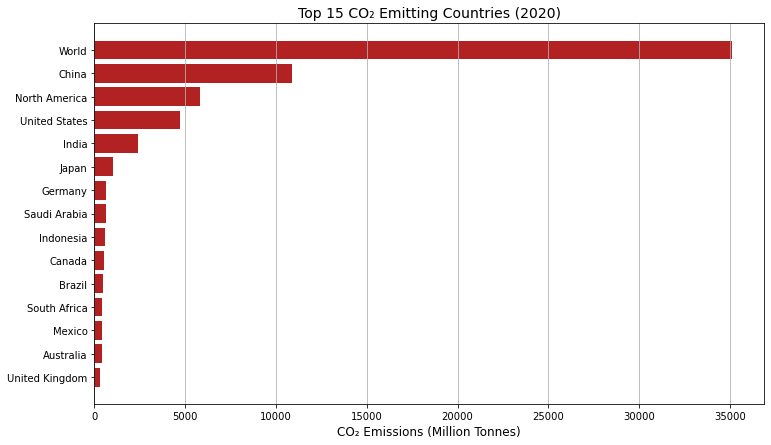

In [86]:

top_emitters = merged_df.sort_values('co2', ascending=False).head(15)

plt.figure(figsize=(12, 7))
plt.barh(top_emitters['Country'], top_emitters['co2'], color='firebrick')
plt.title('Top 15 CO₂ Emitting Countries (2020)', fontsize=14)
plt.xlabel('CO₂ Emissions (Million Tonnes)', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


In [77]:
correlation = merged_df['GDP'].corr(merged_df['co2'])
print(f"Correlation between GDP and CO₂ emissions (2020): {correlation:.4f}")


Correlation between GDP and CO₂ emissions (2020): 0.9790
